In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import json
from typing import Dict, List, Optional
import time
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Configuration pour de beaux graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Imports réussis!")

✓ Imports réussis!


In [2]:
new = pd.read_csv("comparison_15.24_vs_16.1.csv")
new.head()

,champion,lane,patch_15.24,winrate_15.24,pickrate_15.24,banrate_15.24,games_15.24,tier_15.24,patch_16.1,winrate_16.1,pickrate_16.1,banrate_16.1,games_16.1,tier_16.1,wr_change,pr_change,br_change
0,aatrox,top,15.24,49.11,7.00,14.75,25803,B-,16.1,48.29,7.70,8.27,4821,C,-0.82,0.70,-6.48
1,aatrox,jungle,15.24,49.50,7.59,14.75,27345,B-,16.1,47.29,1.47,8.27,903,C,-2.21,-6.12,-6.48
2,aatrox,middle,15.24,47.69,0.18,14.75,694,?,16.1,47.06,0.11,8.27,68,?,-0.63,-0.07,-6.48
3,aatrox,support,15.24,39.50,0.03,14.75,119,?,16.1,11.11,0.01,8.27,9,?,-28.39,-0.02,-6.48
4,ahri,top,15.24,54.94,0.21,1.39,770,S-,16.1,56.25,0.18,1.17,112,A+,1.31,-0.03,-0.22


In [3]:
new = new.sort_values(by='wr_change', ascending=False)
new = new[new["games_16.1"] > 1000]
new.head()

,champion,lane,patch_15.24,winrate_15.24,pickrate_15.24,banrate_15.24,games_15.24,tier_15.24,patch_16.1,winrate_16.1,pickrate_16.1,banrate_16.1,games_16.1,tier_16.1,wr_change,pr_change,br_change
48,aurelionsol,middle,15.24,51.21,1.83,0.53,6922,B+,16.1,55.35,1.94,0.42,1214,A+,4.14,0.11,-0.11
173,gwen,jungle,15.24,51.20,1.45,5.19,5207,B+,16.1,54.85,2.95,5.91,1792,S-,3.65,1.50,0.72
371,nilah,bottom,15.24,51.87,1.47,2.37,5548,B-,16.1,54.95,2.48,3.59,1514,A,3.08,1.01,1.22
501,smolder,bottom,15.24,49.23,7.63,2.87,28761,D,16.1,51.74,7.48,2.84,4565,A-,2.51,-0.15,-0.03
373,nocturne,jungle,15.24,49.48,2.15,1.45,7733,D+,16.1,51.95,2.05,1.49,1259,B-,2.47,-0.10,0.04


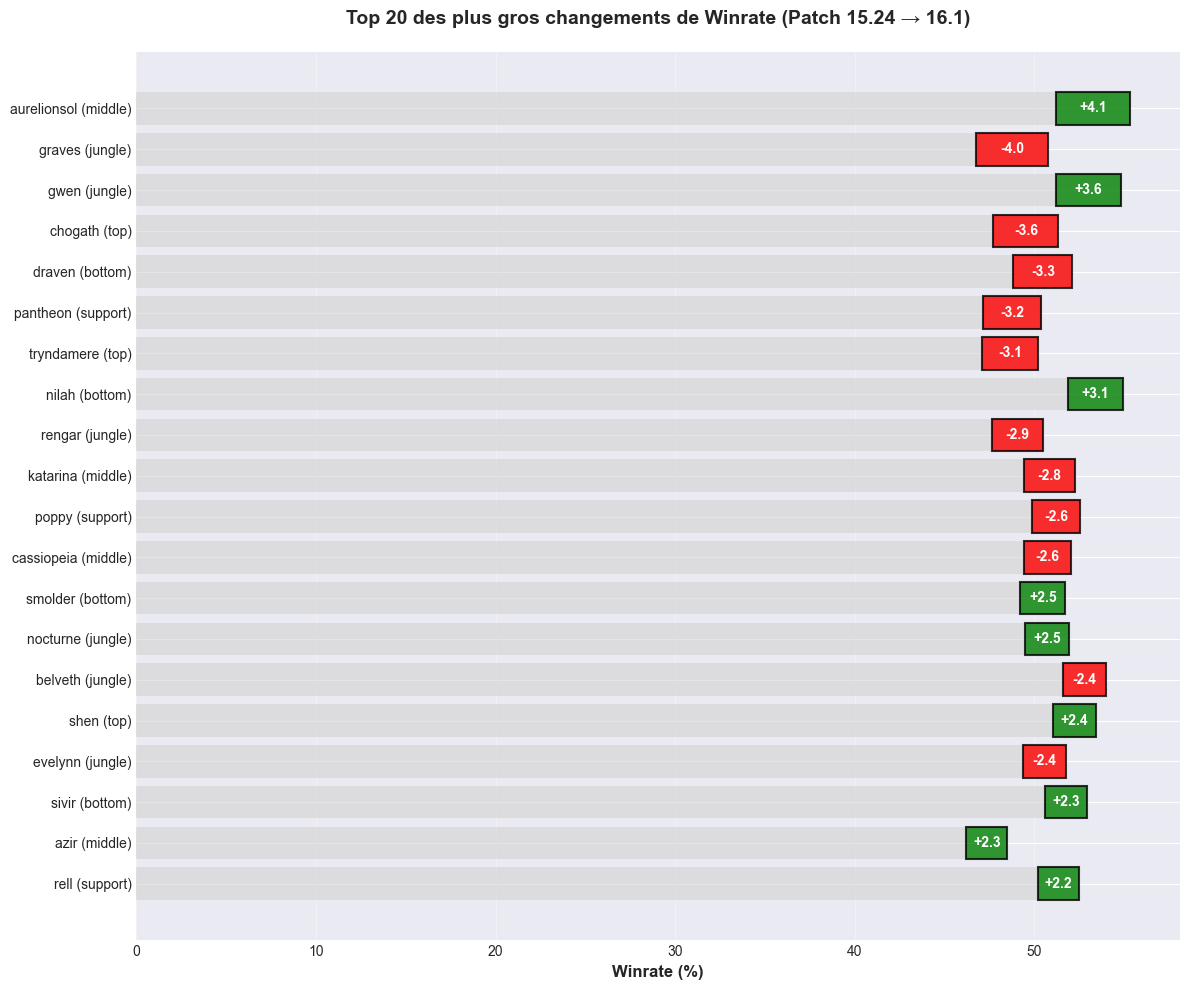

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Trier par changement absolu et prendre le top 20
top_changes = new.iloc[np.argsort(np.abs(new['wr_change']))[-20:]]

# Créer le graphique
fig, ax = plt.subplots(figsize=(12, 10))

# Créer les labels avec champion et lane
labels = [f"{row['champion']} ({row['lane']})" for _, row in top_changes.iterrows()]

# Position des barres
y_pos = range(len(top_changes))

# Barres grises : WR du patch 15.24
ax.barh(y_pos, top_changes['winrate_15.24'], color='lightgray', alpha=0.6, label='WR Patch 15.24')

# Barres colorées : changement de WR (empilées sur les grises)
colors = ['red' if x < 0 else 'green' for x in top_changes['wr_change']]
for i, (idx, row) in enumerate(top_changes.iterrows()):
    change = row['wr_change']
    color = 'red' if change < 0 else 'green'
    ax.barh(i, change, left=row['winrate_15.24'], color=color, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Ajouter la valeur du changement
    x_pos = row['winrate_15.24'] + change/2
    ax.text(x_pos, i, f"{change:+.1f}", va='center', ha='center', 
            fontsize=10, fontweight='bold', color='white')

# Configurer les axes
ax.set_yticks(y_pos)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel('Winrate (%)', fontsize=12, fontweight='bold')
ax.set_title('Top 20 des plus gros changements de Winrate (Patch 15.24 → 16.1)', 
             fontsize=14, fontweight='bold', pad=20)

# Grille
ax.grid(axis='x', alpha=0.3)

# Retirer les bordures supérieure et droite
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [5]:
Top = new[new["lane"] == "top"]
Top.head()

,champion,lane,patch_15.24,winrate_15.24,pickrate_15.24,banrate_15.24,games_15.24,tier_15.24,patch_16.1,winrate_16.1,pickrate_16.1,banrate_16.1,games_16.1,tier_16.1,wr_change,pr_change,br_change
475,shen,top,15.24,51.05,3.47,0.80,12803,A-,16.1,53.44,3.32,0.55,2081,S-,2.39,-0.15,-0.25
635,yasuo,top,15.24,49.34,3.48,15.90,12813,B,16.1,51.32,3.15,16.00,1970,A-,1.98,-0.33,0.10
430,renekton,top,15.24,49.60,5.85,5.40,21551,C-,16.1,51.26,6.65,5.57,4167,B,1.66,0.80,0.17
389,ornn,top,15.24,48.63,3.37,0.25,12432,C-,16.1,50.23,3.15,0.27,1973,B-,1.60,-0.22,0.02
483,singed,top,15.24,51.97,3.11,1.16,11455,A-,16.1,53.40,2.89,0.88,1811,A+,1.43,-0.22,-0.28


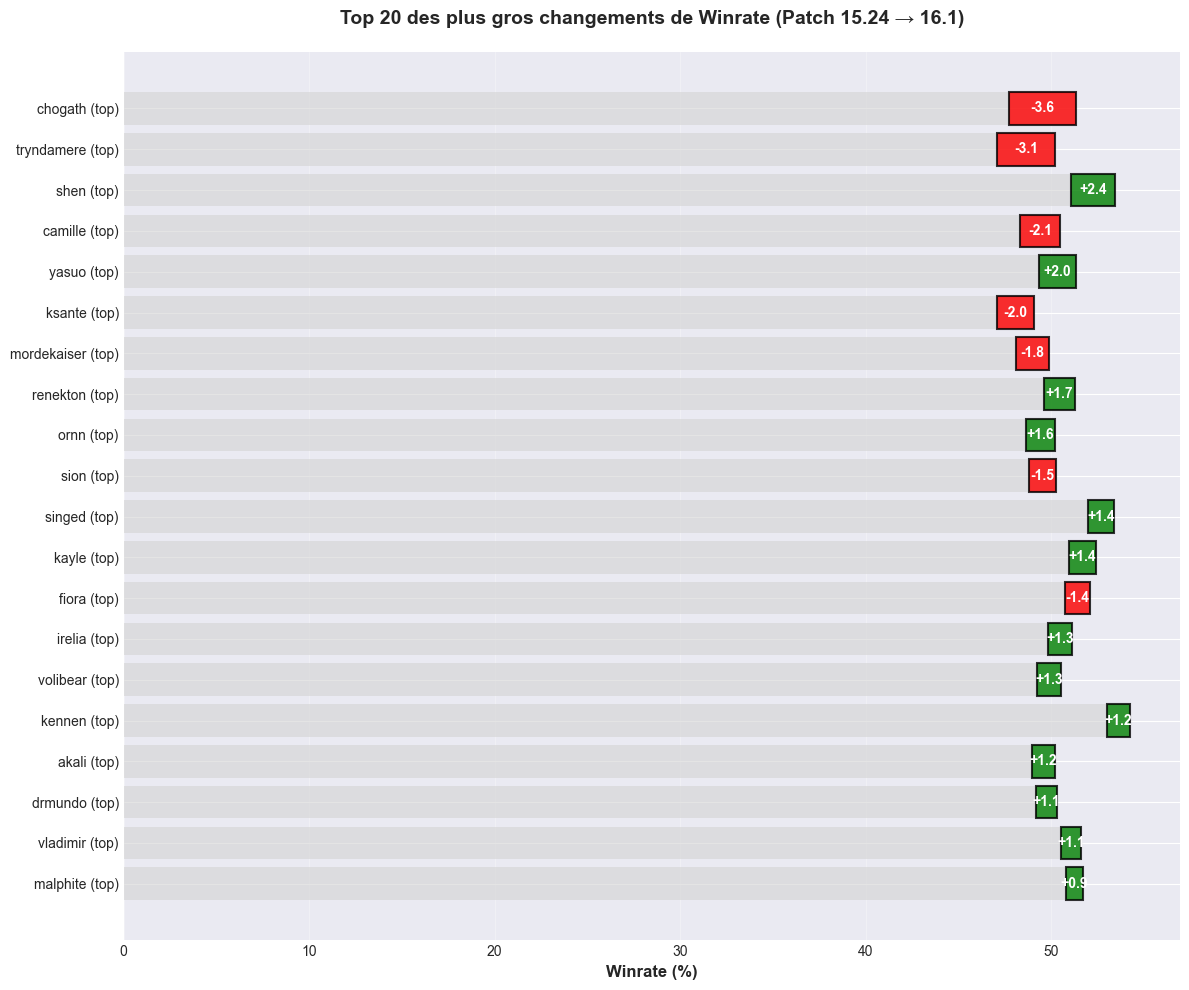

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Trier par changement absolu et prendre le top 20
top_changes = Top.iloc[np.argsort(np.abs(Top['wr_change']))[-20:]]

# Créer le graphique
fig, ax = plt.subplots(figsize=(12, 10))

# Créer les labels avec champion et lane
labels = [f"{row['champion']} ({row['lane']})" for _, row in top_changes.iterrows()]

# Position des barres
y_pos = range(len(top_changes))

# Barres grises : WR du patch 15.24
ax.barh(y_pos, top_changes['winrate_15.24'], color='lightgray', alpha=0.6, label='WR Patch 15.24')

# Barres colorées : changement de WR (empilées sur les grises)
colors = ['red' if x < 0 else 'green' for x in top_changes['wr_change']]
for i, (idx, row) in enumerate(top_changes.iterrows()):
    change = row['wr_change']
    color = 'red' if change < 0 else 'green'
    ax.barh(i, change, left=row['winrate_15.24'], color=color, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Ajouter la valeur du changement
    x_pos = row['winrate_15.24'] + change/2
    ax.text(x_pos, i, f"{change:+.1f}", va='center', ha='center', 
            fontsize=10, fontweight='bold', color='white')

# Configurer les axes
ax.set_yticks(y_pos)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel('Winrate (%)', fontsize=12, fontweight='bold')
ax.set_title('Top 20 des plus gros changements de Winrate (Patch 15.24 → 16.1)', 
             fontsize=14, fontweight='bold', pad=20)

# Grille
ax.grid(axis='x', alpha=0.3)

# Retirer les bordures supérieure et droite
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()